In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv("../data/EV_data_clean.csv")
print(df.head())
print(df.describe())

   Unnamed: 0   read_date  interval_1  interval_2  interval_3  interval_4  \
0           0  2021-03-01      0.0625      0.0500      0.0687      0.0750   
1           1  2021-03-02      0.0625      0.0500      0.0687      0.0625   
2           2  2021-03-03      0.0625      0.0687      0.0500      0.0562   
3           3  2021-03-04      0.0625      0.0625      0.0687      0.0500   
4           4  2021-03-05      0.0625      0.0625      0.0500      0.0625   

   interval_5  interval_6  interval_7  interval_8  ...  interval_41  \
0      0.0687      0.0500      0.0625      0.0687  ...       0.0812   
1      0.0625      0.0562      0.0562      0.0625  ...       0.1375   
2      0.0687      0.0625      0.0625      0.0625  ...       0.1875   
3      0.0562      0.0625      0.0625      0.0625  ...       0.1125   
4      0.0687      0.0625      0.0687      0.0562  ...       0.0812   

   interval_42  interval_43  interval_44  interval_45  interval_46  \
0       0.0687       0.0687       0.0562

In [2]:
#df  = df.drop("id",axis=1)
df.head()

NameError: name 'df' is not defined

In [28]:
df['read_date']= pd.to_datetime(df['read_date'])
df['read_date'].head()

0   2021-03-01
1   2021-03-02
2   2021-03-03
3   2021-03-04
4   2021-03-05
Name: read_date, dtype: datetime64[ns]

In [1]:
df['day_of_week_num'] = df['read_date'].dt.day_of_week
df['day_of_month'] = df['read_date'].dt.day
df['month'] = df['read_date'].dt.month
df.head()

NameError: name 'df' is not defined

In [30]:
df = df.drop("read_date",axis=1)
df.dtypes

Unnamed: 0           int64
interval_1         float64
interval_2         float64
interval_3         float64
interval_4         float64
interval_5         float64
interval_6         float64
interval_7         float64
interval_8         float64
interval_9         float64
interval_10        float64
interval_11        float64
interval_12        float64
interval_13        float64
interval_14        float64
interval_15        float64
interval_16        float64
interval_17        float64
interval_18        float64
interval_19        float64
interval_20        float64
interval_21        float64
interval_22        float64
interval_23        float64
interval_24        float64
interval_25        float64
interval_26        float64
interval_27        float64
interval_28        float64
interval_29        float64
interval_30        float64
interval_31        float64
interval_32        float64
interval_33        float64
interval_34        float64
interval_35        float64
interval_36        float64
i

In [31]:
df = df.drop("day_of_week",axis=1)

KeyError: "['day_of_week'] not found in axis"

In [21]:
X= df.drop(df.columns[-1],axis=1)
print(X.shape)
y= df[df.columns[-1]]
print(y.shape)

(4048, 52)
(4048,)


In [22]:



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Set up the KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Lists to store the scores from each fold
train_scores_lr = []
val_scores_lr = []
train_scores_rf = []
val_scores_rf = []
train_scores_knn = []
val_scores_knn = []
train_scores_xgb = []
val_scores_xgb = []

# Iterate over the folds
for train_idx, val_idx in kfold.split(X_train, y_train):
    # Split the training data into train and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Create the models
    lr_model = LogisticRegression(random_state=1)
    rf_model = RandomForestClassifier(random_state=1)
    knn_model = KNeighborsClassifier()
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1)

    # Train the models on the training fold
    lr_model.fit(X_train_fold, y_train_fold)
    rf_model.fit(X_train_fold, y_train_fold)
    knn_model.fit(X_train_fold, y_train_fold)
    xgb_model.fit(X_train_fold, y_train_fold)

    # Evaluate the models on the validation fold
    train_score_lr = accuracy_score(y_train_fold, lr_model.predict(X_train_fold))
    val_score_lr = accuracy_score(y_val_fold, lr_model.predict(X_val_fold))

    train_score_rf = accuracy_score(y_train_fold, rf_model.predict(X_train_fold))
    val_score_rf = accuracy_score(y_val_fold, rf_model.predict(X_val_fold))

    train_score_knn = accuracy_score(y_train_fold, knn_model.predict(X_train_fold))
    val_score_knn = accuracy_score(y_val_fold, knn_model.predict(X_val_fold))

    train_score_xgb = accuracy_score(y_train_fold, xgb_model.predict(X_train_fold))
    val_score_xgb = accuracy_score(y_val_fold, xgb_model.predict(X_val_fold))

    # Append the scores to the lists
    train_scores_lr.append(train_score_lr)
    val_scores_lr.append(val_score_lr)
    train_scores_rf.append(train_score_rf)
    val_scores_rf.append(val_score_rf)
    train_scores_knn.append(train_score_knn)
    val_scores_knn.append(val_score_knn)
    train_scores_xgb.append(train_score_xgb)
    val_scores_xgb.append(val_score_xgb)

    print(f'Fold {len(train_scores_lr)}:')
    print(f'Logistic Regression: Train Accuracy = {train_score_lr:.4f}, Validation Accuracy = {val_score_lr:.4f}')
    print(f'Random Forest: Train Accuracy = {train_score_rf:.4f}, Validation Accuracy = {val_score_rf:.4f}')
    print(f'KNN: Train Accuracy = {train_score_knn:.4f}, Validation Accuracy = {val_score_knn:.4f}')
    print(f'XGBoost: Train Accuracy = {train_score_xgb:.4f}, Validation Accuracy = {val_score_xgb:.4f}')

# Print the mean scores
print('\nMean Scores:')
print(f'Logistic Regression: Mean Train Accuracy = {sum(train_scores_lr) / len(train_scores_lr):.4f}, Mean Validation Accuracy = {sum(val_scores_lr) / len(val_scores_lr):.4f}')
print(f'Random Forest: Mean Train Accuracy = {sum(train_scores_rf) / len(train_scores_rf):.4f}, Mean Validation Accuracy = {sum(val_scores_rf) / len(val_scores_rf):.4f}')
print(f'KNN: Mean Train Accuracy = {sum(train_scores_knn) / len(train_scores_knn):.4f}, Mean Validation Accuracy = {sum(val_scores_knn) / len(val_scores_knn):.4f}')
print(f'XGBoost: Mean Train Accuracy = {sum(train_scores_xgb) / len(train_scores_xgb):.4f}, Mean Validation Accuracy = {sum(val_scores_xgb) / len(val_scores_xgb):.4f}')

# Train the final models on the entire training set
final_lr_model = LogisticRegression(random_state=42)
final_rf_model = RandomForestClassifier(random_state=42)
final_knn_model = KNeighborsClassifier()
final_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

final_lr_model.fit(X_train, y_train)
final_rf_model.fit(X_train, y_train)
final_knn_model.fit(X_train, y_train)
final_xgb_model.fit(X_train, y_train)

# Evaluate the final models on the test set
test_accuracy_lr = accuracy_score(y_test, final_lr_model.predict(X_test))
test_accuracy_rf = accuracy_score(y_test, final_rf_model.predict(X_test))
test_accuracy_knn = accuracy_score(y_test, final_knn_model.predict(X_test))
test_accuracy_xgb = accuracy_score(y_test, final_xgb_model.predict(X_test))

print('\nTest Accuracies:')
print(f'Logistic Regression: {test_accuracy_lr:.4f}')
print(f'Random Forest: {test_accuracy_rf:.4f}')
print(f'KNN: {test_accuracy_knn:.4f}')
print(f'XGBoost: {test_accuracy_xgb:.4f}')

/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1:
Logistic Regression: Train Accuracy = 0.1961, Validation Accuracy = 0.1404
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.2670
KNN: Train Accuracy = 0.1892, Validation Accuracy = 0.0293
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 1.0000


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2:
Logistic Regression: Train Accuracy = 0.1907, Validation Accuracy = 0.1512
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.2793
KNN: Train Accuracy = 0.1919, Validation Accuracy = 0.0247
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 1.0000


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3:
Logistic Regression: Train Accuracy = 0.1927, Validation Accuracy = 0.1790
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.3117
KNN: Train Accuracy = 0.1900, Validation Accuracy = 0.0293
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 1.0000


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4:
Logistic Regression: Train Accuracy = 0.1710, Validation Accuracy = 0.2056
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.2643
KNN: Train Accuracy = 0.1949, Validation Accuracy = 0.0155
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 1.0000


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5:
Logistic Regression: Train Accuracy = 0.1880, Validation Accuracy = 0.1793
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.2875
KNN: Train Accuracy = 0.1887, Validation Accuracy = 0.0216
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 1.0000

Mean Scores:
Logistic Regression: Mean Train Accuracy = 0.1877, Mean Validation Accuracy = 0.1711
Random Forest: Mean Train Accuracy = 1.0000, Mean Validation Accuracy = 0.2820
KNN: Mean Train Accuracy = 0.1909, Mean Validation Accuracy = 0.0241
XGBoost: Mean Train Accuracy = 1.0000, Mean Validation Accuracy = 1.0000


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Test Accuracies:
Logistic Regression: 0.1531
Random Forest: 0.3272
KNN: 0.0111
XGBoost: 1.0000


Top 10 Important Features:
         feature  importance
50  day_of_month      3691.0
51         month       699.0
0     Unnamed: 0        78.0
14   interval_14        36.0
21   interval_21        31.0
27   interval_27        29.0
29   interval_29        29.0
15   interval_15        28.0
1     interval_1        28.0
36   interval_36        28.0


<Figure size 1000x600 with 0 Axes>

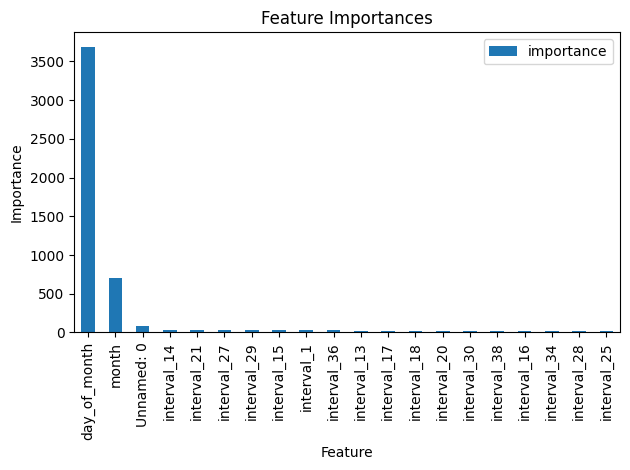

In [23]:
# Get the feature importances
feature_importances = final_xgb_model.get_booster().get_score(importance_type='weight')

# Convert the feature importances to a DataFrame
feature_importances = pd.DataFrame(feature_importances.items(), columns=['feature', 'importance'])

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
feature_importances.head(20).plot.bar(x='feature', y='importance')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [61]:
df=df.drop("Unnamed: 0",axis=1)
data_grouped = df.groupby('id')
data_grouped.head()


KeyError: "['Unnamed: 0'] not found in axis"

In [63]:
df.to_csv("../data/EV_data_date_fixed")

NameError: name 'df' is not defined

In [54]:
unique_ids = df['id'].unique()
unique_ids

array([ 1,  2, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 24, 23, 22, 11,  3,  4,  5,  6,  7,  8,  9, 10, 12,
       21, 13, 14, 15, 16, 17, 18, 19, 20, 44, 50, 86, 59, 78, 49, 72, 54,
       75, 53, 66, 79, 70, 60, 74, 62, 52, 45, 77, 63, 68, 47, 64, 69, 84,
       48, 82, 80, 55, 67, 81, 71, 58, 51, 65, 76, 61, 85, 56, 88, 46, 87,
       83, 73, 57])

In [55]:
from sklearn.model_selection import train_test_split
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

In [56]:
train_data = df.loc[df['id'].isin(train_ids)]
test_data = df.loc[df['id'].isin(test_ids)]

In [60]:
X_train = train_data.drop(["id","label"],axis=1)
y_train = train_data["label"]
X_test = test_data.drop(["id","label"],axis=1)
y_test = test_data["label"]
X_train.head()

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,...,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,day_of_week_num,day_of_month,month
46,0.1562,0.1562,0.1500,0.1437,0.1187,0.1125,0.1312,0.1625,0.1875,0.1000,...,0.2125,0.2125,0.1812,0.1812,1.2437,1.3500,1.7812,0,1,3
47,1.3437,1.3687,1.3937,1.3625,1.3187,1.5437,0.2250,0.1187,0.1500,0.1375,...,0.1437,0.1437,0.1562,0.0875,0.8875,1.6687,1.3875,1,2,3
48,1.7312,1.3500,1.3062,1.3125,0.2125,0.0687,0.1000,0.0875,0.0562,0.0500,...,0.1187,0.1562,0.1375,0.1562,0.9750,1.3000,1.5625,2,3,3
49,1.2937,1.6875,1.3000,1.3187,1.3250,1.2875,0.5937,0.0625,0.0750,0.0812,...,0.1312,0.1187,0.2312,0.0937,0.9062,1.3250,1.6437,3,4,3
50,1.3375,1.8000,1.3125,1.2875,1.3062,1.3000,0.3937,0.0812,0.1000,0.0500,...,0.0750,0.0625,0.0437,0.0875,0.1000,0.0750,0.1000,4,5,3


In [58]:
# Set up the KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the scores from each fold
train_scores_lr = []
val_scores_lr = []
train_scores_rf = []
val_scores_rf = []
train_scores_knn = []
val_scores_knn = []
train_scores_xgb = []
val_scores_xgb = []

# Iterate over the folds
for train_idx, val_idx in kfold.split(X_train, y_train):
    # Split the training data into train and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Create the models
    lr_model = LogisticRegression(random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    knn_model = KNeighborsClassifier()
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

    # Train the models on the training fold
    lr_model.fit(X_train_fold, y_train_fold)
    rf_model.fit(X_train_fold, y_train_fold)
    knn_model.fit(X_train_fold, y_train_fold)
    xgb_model.fit(X_train_fold, y_train_fold)

    # Evaluate the models on the validation fold
    train_score_lr = accuracy_score(y_train_fold, lr_model.predict(X_train_fold))
    val_score_lr = accuracy_score(y_val_fold, lr_model.predict(X_val_fold))

    train_score_rf = accuracy_score(y_train_fold, rf_model.predict(X_train_fold))
    val_score_rf = accuracy_score(y_val_fold, rf_model.predict(X_val_fold))

    train_score_knn = accuracy_score(y_train_fold, knn_model.predict(X_train_fold))
    val_score_knn = accuracy_score(y_val_fold, knn_model.predict(X_val_fold))

    train_score_xgb = accuracy_score(y_train_fold, xgb_model.predict(X_train_fold))
    val_score_xgb = accuracy_score(y_val_fold, xgb_model.predict(X_val_fold))

    # Append the scores to the lists
    train_scores_lr.append(train_score_lr)
    val_scores_lr.append(val_score_lr)
    train_scores_rf.append(train_score_rf)
    val_scores_rf.append(val_score_rf)
    train_scores_knn.append(train_score_knn)
    val_scores_knn.append(val_score_knn)
    train_scores_xgb.append(train_score_xgb)
    val_scores_xgb.append(val_score_xgb)

    print(f'Fold {len(train_scores_lr)}:')
    print(f'Logistic Regression: Train Accuracy = {train_score_lr:.4f}, Validation Accuracy = {val_score_lr:.4f}')
    print(f'Random Forest: Train Accuracy = {train_score_rf:.4f}, Validation Accuracy = {val_score_rf:.4f}')
    print(f'KNN: Train Accuracy = {train_score_knn:.4f}, Validation Accuracy = {val_score_knn:.4f}')
    print(f'XGBoost: Train Accuracy = {train_score_xgb:.4f}, Validation Accuracy = {val_score_xgb:.4f}')
    # Print the mean scores
print('\nMean Scores:')
print(f'Logistic Regression: Mean Train Accuracy = {sum(train_scores_lr) / len(train_scores_lr):.4f}, Mean Validation Accuracy = {sum(val_scores_lr) / len(val_scores_lr):.4f}')
print(f'Random Forest: Mean Train Accuracy = {sum(train_scores_rf) / len(train_scores_rf):.4f}, Mean Validation Accuracy = {sum(val_scores_rf) / len(val_scores_rf):.4f}')
print(f'KNN: Mean Train Accuracy = {sum(train_scores_knn) / len(train_scores_knn):.4f}, Mean Validation Accuracy = {sum(val_scores_knn) / len(val_scores_knn):.4f}')
print(f'XGBoost: Mean Train Accuracy = {sum(train_scores_xgb) / len(train_scores_xgb):.4f}, Mean Validation Accuracy = {sum(val_scores_xgb) / len(val_scores_xgb):.4f}')

# Train the final models on the entire training set
final_lr_model = LogisticRegression(random_state=42)
final_rf_model = RandomForestClassifier(random_state=42)
final_knn_model = KNeighborsClassifier()
final_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

final_lr_model.fit(X_train, y_train)
final_rf_model.fit(X_train, y_train)
final_knn_model.fit(X_train, y_train)
final_xgb_model.fit(X_train, y_train)

# Evaluate the final models on the test set
test_accuracy_lr = accuracy_score(y_test, final_lr_model.predict(X_test))
test_accuracy_rf = accuracy_score(y_test, final_rf_model.predict(X_test))
test_accuracy_knn = accuracy_score(y_test, final_knn_model.predict(X_test))
test_accuracy_xgb = accuracy_score(y_test, final_xgb_model.predict(X_test))

print('\nTest Accuracies:')
print(f'Logistic Regression: {test_accuracy_lr:.4f}')
print(f'Random Forest: {test_accuracy_rf:.4f}')
print(f'KNN: {test_accuracy_knn:.4f}')
print(f'XGBoost: {test_accuracy_xgb:.4f}')

/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1:
Logistic Regression: Train Accuracy = 0.7100, Validation Accuracy = 0.7298
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.9255
KNN: Train Accuracy = 0.8436, Validation Accuracy = 0.7640
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.9441


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2:
Logistic Regression: Train Accuracy = 0.7205, Validation Accuracy = 0.6894
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.8913
KNN: Train Accuracy = 0.8502, Validation Accuracy = 0.7640
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.9208


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3:
Logistic Regression: Train Accuracy = 0.7189, Validation Accuracy = 0.7050
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.9037
KNN: Train Accuracy = 0.8498, Validation Accuracy = 0.7780
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.9255


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4:
Logistic Regression: Train Accuracy = 0.7275, Validation Accuracy = 0.6957
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.9255
KNN: Train Accuracy = 0.8358, Validation Accuracy = 0.7748
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.9457


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 5:
Logistic Regression: Train Accuracy = 0.7147, Validation Accuracy = 0.6863
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.9053
KNN: Train Accuracy = 0.8525, Validation Accuracy = 0.7562
XGBoost: Train Accuracy = 1.0000, Validation Accuracy = 0.9146

Mean Scores:
Logistic Regression: Mean Train Accuracy = 0.7183, Mean Validation Accuracy = 0.7012
Random Forest: Mean Train Accuracy = 1.0000, Mean Validation Accuracy = 0.9102
KNN: Mean Train Accuracy = 0.8464, Mean Validation Accuracy = 0.7674
XGBoost: Mean Train Accuracy = 1.0000, Mean Validation Accuracy = 0.9301


/Users/bijubiju/Desktop/ml projects/current/Transformer/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Test Accuracies:
Logistic Regression: 0.6449
Random Forest: 0.8273
KNN: 0.8068
XGBoost: 0.8309


Top 10 Important Features:
        feature  importance
11  interval_12        66.0
13  interval_14        64.0
14  interval_15        57.0
32  interval_33        55.0
10  interval_11        55.0
8    interval_9        53.0
44  interval_45        52.0
34  interval_35        52.0
0    interval_1        50.0
47  interval_48        50.0


<Figure size 1000x600 with 0 Axes>

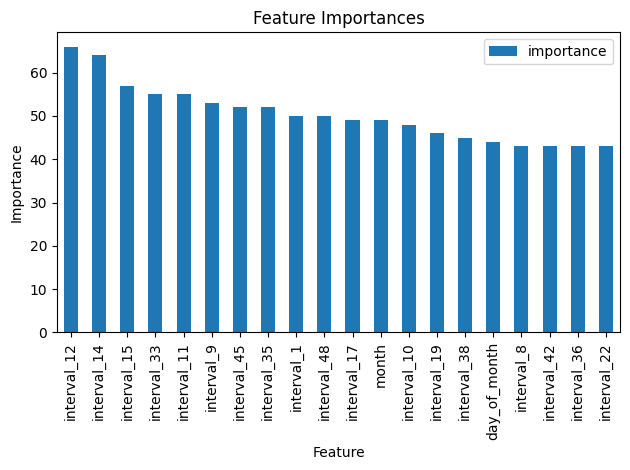

In [59]:
# Get the feature importances
feature_importances = final_xgb_model.get_booster().get_score(importance_type='weight')

# Convert the feature importances to a DataFrame
feature_importances = pd.DataFrame(feature_importances.items(), columns=['feature', 'importance'])

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
feature_importances.head(20).plot.bar(x='feature', y='importance')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()